## Electronic Supplementary Material
# Using Network Analysis to Identify Key Scenario Elements Across Multiple Energy Scenario Studies
## Revision 3 (Revised date: 16 February 2020)

## Journal: Society and Natural Resources


In [1]:
import csv
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
from seaborn import color_palette, set_style, palplot

In [2]:
#Check version
import pkg_resources
print('Networkx Version: ',pkg_resources.get_distribution('networkx').version)
print('Pandas Version: ',pkg_resources.get_distribution('pandas').version)
print('Matplotlib Version: ',pkg_resources.get_distribution('matplotlib').version)

Networkx Version:  2.3
Pandas Version:  0.25.1
Matplotlib Version:  3.1.1


## Five Energy Scenarios Reports
![wec-repcover](https://3.bp.blogspot.com/-wXSTz8mV_1w/W4RUZlfd8eI/AAAAAAAAAoM/gr86cPr28CM9s2qHoSaollrZfE254FuKgCLcBGAs/s1600/5repocover.png)

Note: In the SNR article, only 4 Canadian energy futures studies are examined

## Getting the data
### Description of Edgelist.csv file
We subjected four Canadian energy futures studies and one global study to search and extract text strings or statements implying scenario elements influencing other elements in the future. These statements suggest some interrelationships between two scenario elements. We emphasize on the 'future', which means that the statements describing influences in the past would not be considered; instead, statements indicating influences in the future would be incorporated into the dataset (Edgelist.csv). The dataset comprises a list of two scenario elements deemed to have an established relationship. In this study, the edges are non-directed because statements describing the interrelationship might not be explicit in indicating causations, instead they imply correlationships.

In [3]:
se = pd.read_csv('./data/ES_edgelist.csv', sep=',')
se.head()

,node1,node2,report_name
0,Oil consumption,GHG Emissions (aggregate),Trottier
1,LNG consumption,GHG Emissions (aggregate),Trottier
2,Electricity consumption,GHG Emissions (aggregate),Trottier
3,Biofuels consumption,Oil consumption,Trottier
4,Oil consumption,GHG Emissions (aggregate),Trottier


We first load the compiled edgelist in the .csv file into a pandas dataframe. The dataframe has three columns, node1, node2, and report_name. Node1 and Node2 will form a edge between the two nodes.

In [4]:
# Seperating edgelist into different dataframes so that nodes/edges can be manipulated individually
se4 = se.iloc[:192]
se_trot = se.iloc[:30]
se_deep = se.iloc[30:72]
se_neb = se.iloc[72:92]
se_rnrg = se.iloc[92:192]
se_wec = se.iloc[192:]

In [5]:
GSE5 = nx.from_pandas_edgelist(se,'node1','node2',edge_attr=None) # edge_attr not needed
GSE4 = nx.from_pandas_edgelist(se4,'node1','node2',edge_attr=None)
GSE_wec = nx.from_pandas_edgelist(se_wec,'node1','node2',edge_attr=None) # Individual network for WEC global scenarios
GSE_trot = nx.from_pandas_edgelist(se_trot,'node1','node2',edge_attr=None) # Individual network for TEFP
GSE_deep = nx.from_pandas_edgelist(se_deep,'node1','node2',edge_attr=None) # Individual network for DDPC
GSE_neb = nx.from_pandas_edgelist(se_neb,'node1','node2',edge_attr=None) # Individual network for NEB
GSE_rnrg = nx.from_pandas_edgelist(se_rnrg,'node1','node2',edge_attr=None) # Individual network for Re-energizing Canada

## Visualizing different scope of energy scenarios
The graphs GSE (Graphs Scenarios Energy) are created using Networkx by importing edgelist from a pandas dataframe. Note that the GSE4 is a graph for 4 Canada scenario reports. The GSE5 will become the overall 'layout' in this study while the *smaller* graphs (e.g. GSE4 and GSE_example) will be layered over (or super-imposed on) the overall layout.

We inspect individual network information as follow:

In [6]:
print ('Multi-study network comprises of four Canadian and one global studies\n',nx.info(GSE5))
print ('\nMulti-study network comprises of four Canadian studies\n',nx.info(GSE4))
print ('\nNetwork for Trottier Energy Futures Project (TEFP)\n',nx.info(GSE_trot))
print ('\nNetwork for Deep Decarbonization Pathways for Canada\n',nx.info(GSE_deep))
print ('\nNetwork for National Energy Board 2016 report\m',nx.info(GSE_neb))
print ('\nNetwork for the Re-energizing Canada/n',nx.info(GSE_rnrg))

Multi-study network comprises of four Canadian and one global studies
 Name: 
Type: Graph
Number of nodes: 177
Number of edges: 245
Average degree:   2.7684

Multi-study network comprises of four Canadian studies
 Name: 
Type: Graph
Number of nodes: 134
Number of edges: 181
Average degree:   2.7015

Network for Trottier Energy Futures Project (TEFP)
 Name: 
Type: Graph
Number of nodes: 27
Number of edges: 28
Average degree:   2.0741

Network for Deep Decarbonization Pathways for Canada
 Name: 
Type: Graph
Number of nodes: 41
Number of edges: 39
Average degree:   1.9024

Network for National Energy Board 2016 report\m Name: 
Type: Graph
Number of nodes: 18
Number of edges: 19
Average degree:   2.1111

Network for the Re-energizing Canada/n Name: 
Type: Graph
Number of nodes: 95
Number of edges: 99
Average degree:   2.0842


## Visualizing Multi-study Network

In [7]:
layout = nx.kamada_kawai_layout(GSE5)

/Users/herijadi_kurniawan/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


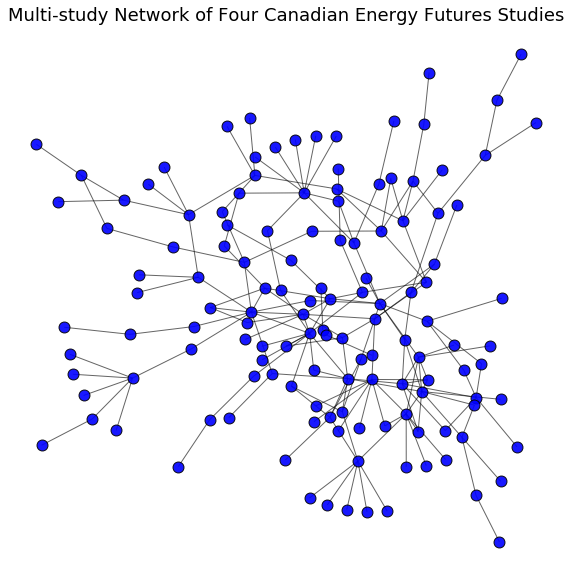

In [8]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Multi-study Network of Four Canadian Energy Futures Studies',fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=120, alpha=.9, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=1, alpha=.6)

plt.show()

## Visualizing Different Perspectives of Individual Study

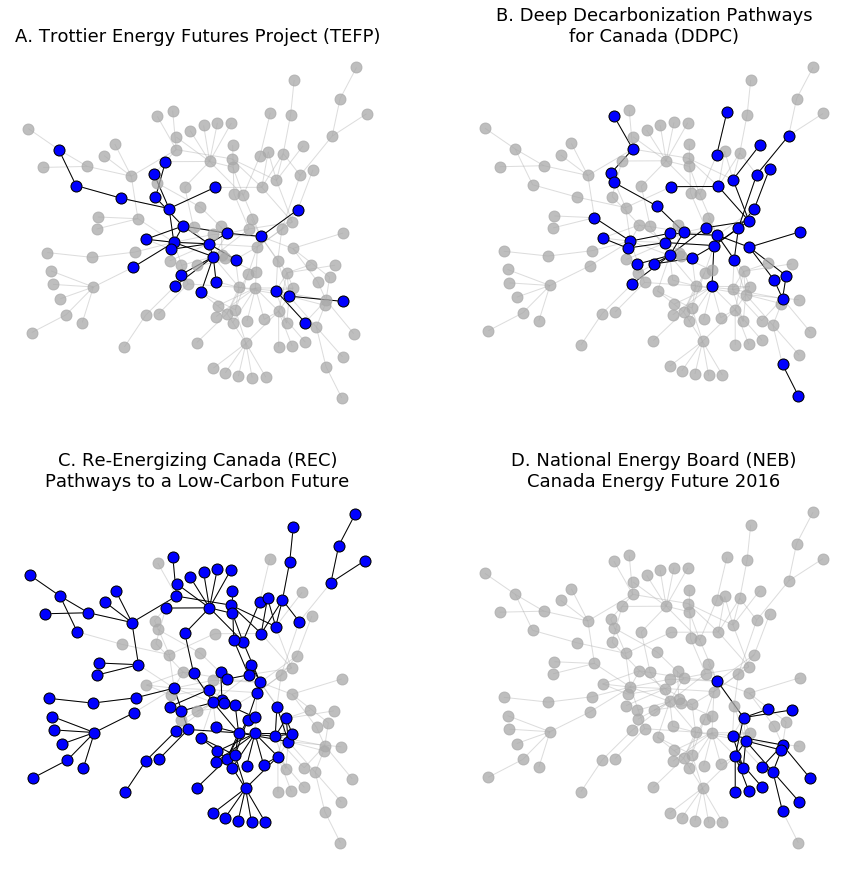

In [9]:
#customization lines for different studies
studytext1 = 'A. Trottier Energy Futures Project (TEFP)'
studytext2 = 'B. Deep Decarbonization Pathways\nfor Canada (DDPC)'
studytext3 = 'C. Re-Energizing Canada (REC)\nPathways to a Low-Carbon Future'
studytext4 = 'D. National Energy Board (NEB)\nCanada Energy Future 2016'

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)

plt.subplot(222)
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_deep, layout, edge_color='k',width=1)

plt.subplot(223)
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='k',width=1)

plt.subplot(224)
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_neb, layout, edge_color='k',width=1)

plt.savefig('./figures/SNR-ESM-Fig1.png', bbox_inches = 'tight')
plt.show()

In [10]:
GSE_trot.nodes()

NodeView(('Oil consumption', 'GHG Emissions (aggregate)', 'LNG consumption', 'Electricity consumption', 'Biofuels consumption', 'Oil demand (global)', 'Oil sand production', 'LNG demand (global)', 'LNG production', 'Freight (trade) volume', 'GHG Emissions (transport)', 'Feedstock (biofuel) supply', 'Biofuels production', 'GHG reduction target', 'Energy intensity', 'Adoption of EV', 'Sectoral coordination', 'Use of electrical appliances', 'Electricity consumption (residential)', 'Hydro electric generation', 'GHG Emissions (electricity)', 'Wind power generation', 'New clean tech generation', 'Biofuels consumption (Freight)', 'Electrification of rail transport', 'Inter-province HV infrastructure', 'Inter-province electricity trade'))

In [11]:
GSE_deep.nodes()

NodeView(('Fuel switching', 'GHG Emissions (aggregate)', 'Renewable energy generation', 'Wind power production cost', 'Wind power generation', 'Solar power production cost', 'Solar power generation', 'Innovation capacity (global)', 'Banning coal/oil-fired generation', 'Carbon intensity', 'Gas-fired generation', 'LNG demand', 'New clean tech generation', 'Electricity generation', 'Electrification policy', 'Tech dev in renewable energy', 'GHG Emissions (building)', 'Adoption of EV', 'GHG Emissions (transport)', 'Electrification of rail transport', 'GHG Emissions (oil and gas)', 'Tech dev in energy storage', 'Oil consumption', 'Oil prices (global)', 'Energy tech change (transport)', 'Energy efficiency policy mandate', 'Energy tech change (building)', 'Energy intensity', 'Tech dev in low carbon system', 'Building retrofit incentives', 'Tech dev in green transport', 'Transport modal shift', 'Energy intensity (transport)', 'LNG consumption', 'Biofuels consumption', 'GHG reduction target', 'G

In [12]:
GSE_rnrg.nodes()

NodeView(('Environmental impacts', 'Social acceptance', 'Electricity generation', 'Geographic availability', 'Energy production cost', 'Solar power production cost', 'Wind power production cost', 'Agricultural production', 'Trucking (heavy freight) load', 'Forest production', 'Oil sand production', 'LNG production', 'Freight (trade) volume', 'Innovation capacity', 'Tech dev in energy efficiency', 'Active mobility', 'Carbon intensity', 'Energy intensity', 'Tech dev in artifical intelligence', 'Indigenous knowledge', 'Energy studies scholarship', 'Management of natural resources', 'GHG Emissions (aggregate)', 'Number of people per household', 'Energy consumption', 'House size', 'Distance travel', 'Road speed limit', 'Number of passenger per vehicle', 'Use of electrical appliances', 'Inter-province HV infrastructure', 'Inter-province electricity trade', 'Harmonize elect generation load profile', 'Large-scale hydropower construction', 'Climate change', 'Loss of biodiversity', 'Road infrast

In [13]:
GSE_neb.nodes()

NodeView(('Oil demand (global)', 'Oil prices (global)', 'LNG production (USA)', 'Oil sand production', 'LNG demand (USA/Canada)', 'LNG prices (global)', 'Population', 'GDP', 'USA Economy', 'Rise of China and Asia', 'Export', 'LNG infrastructures development', 'LNG production', 'Energy intensity', 'Developing countries GDP', 'Oil infrastructures development', 'LNG demand (USA)', 'LNG demand'))

## Visualizing individual network

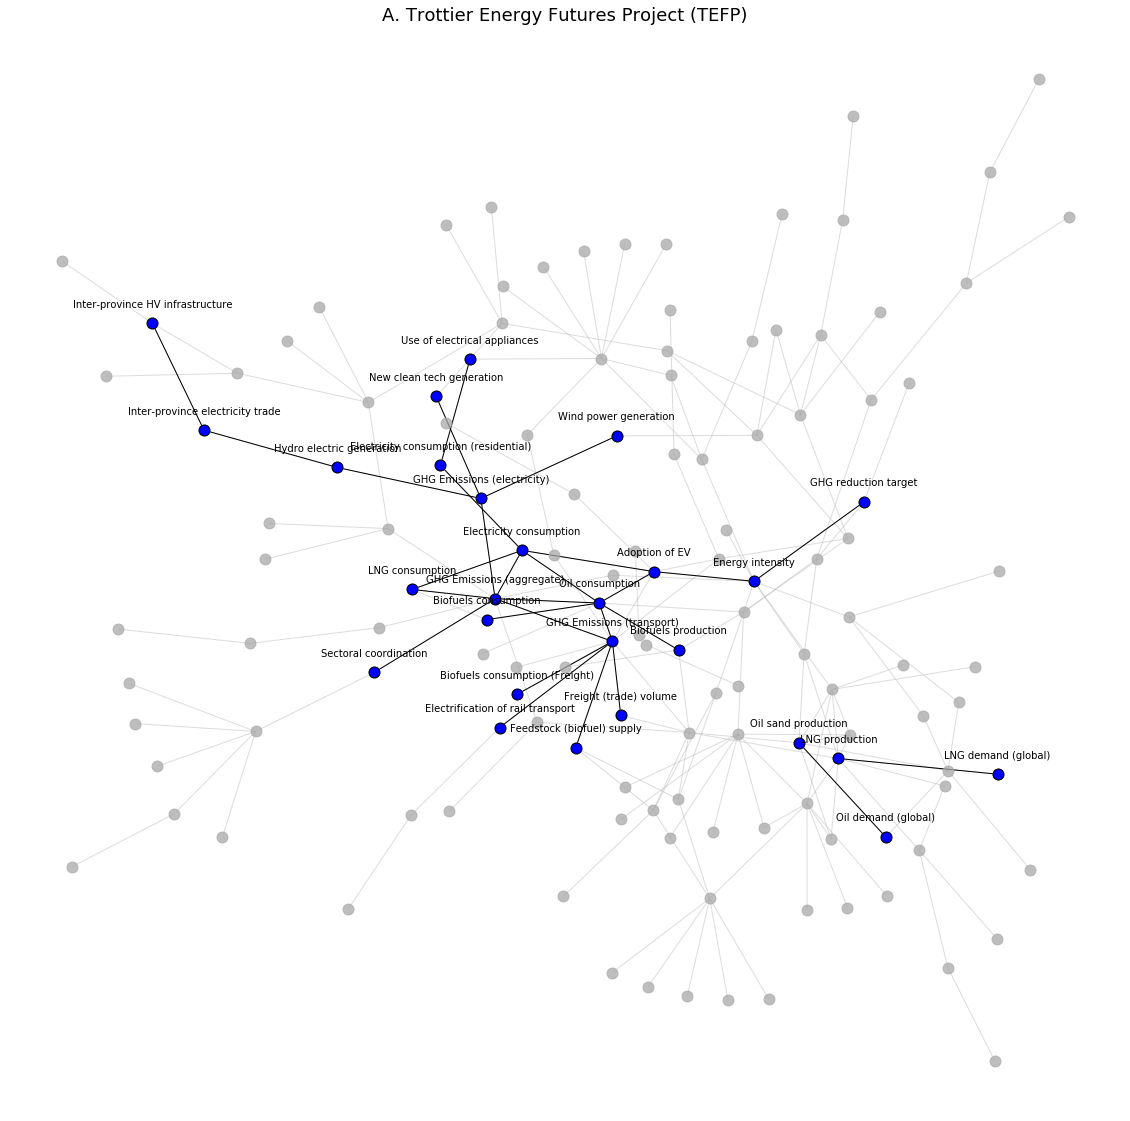

In [14]:
pos_attrs = {}
for node, coords in layout.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.03)

plt.figure(figsize=(20,20))
plt.axis('off')
plt.title(studytext1,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_trot, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_trot, layout, edge_color='k',width=1)
nx.draw_networkx_labels(GSE_trot, pos_attrs, font_size=10)

plt.savefig('./figures/SNR-ESM-Fig1a.png', bbox_inches = 'tight')
plt.show()

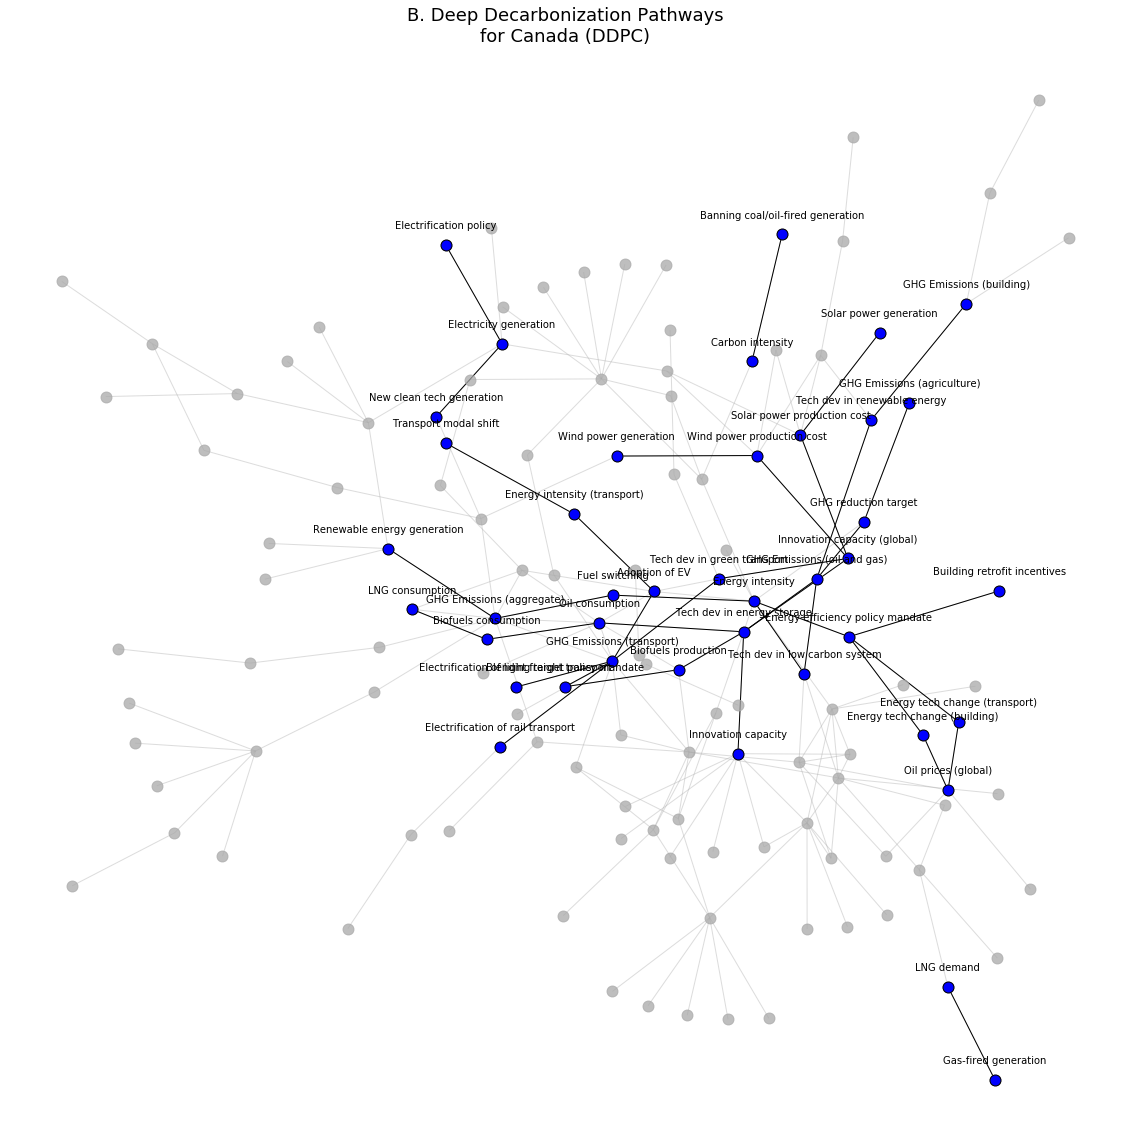

In [15]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.title(studytext2,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_deep, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_deep, layout, edge_color='k',width=1)
nx.draw_networkx_labels(GSE_deep, pos_attrs, font_size=10)

plt.savefig('./figures/SNR-ESM-Fig1b.png', bbox_inches = 'tight')
plt.show()

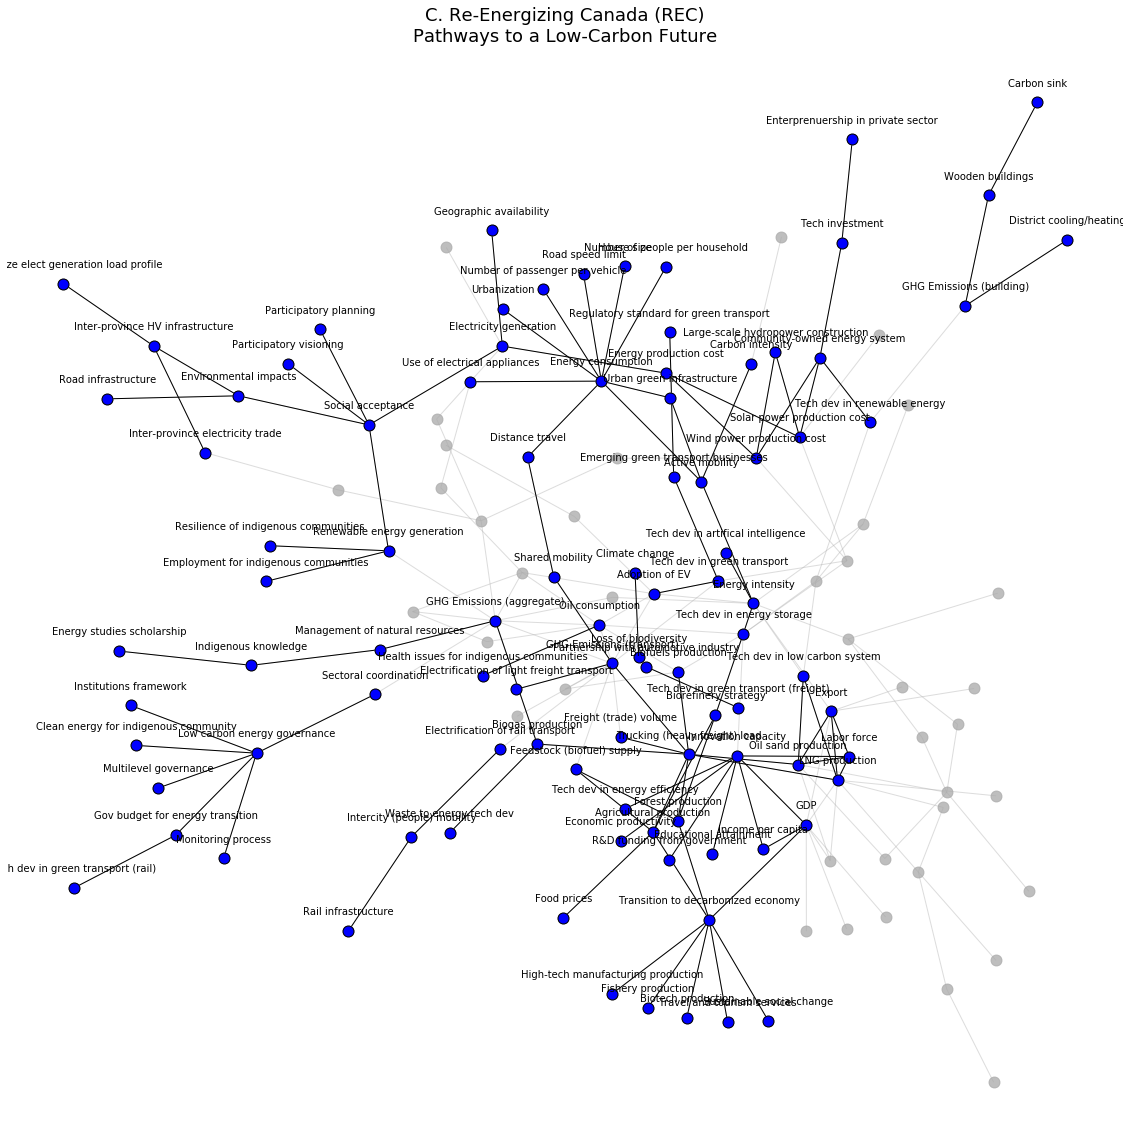

In [16]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.title(studytext3,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_rnrg, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_rnrg, layout, edge_color='k',width=1)
nx.draw_networkx_labels(GSE_rnrg, pos_attrs, font_size=10)

plt.savefig('./figures/SNR-ESM-Fig1c.png', bbox_inches = 'tight')
plt.show()

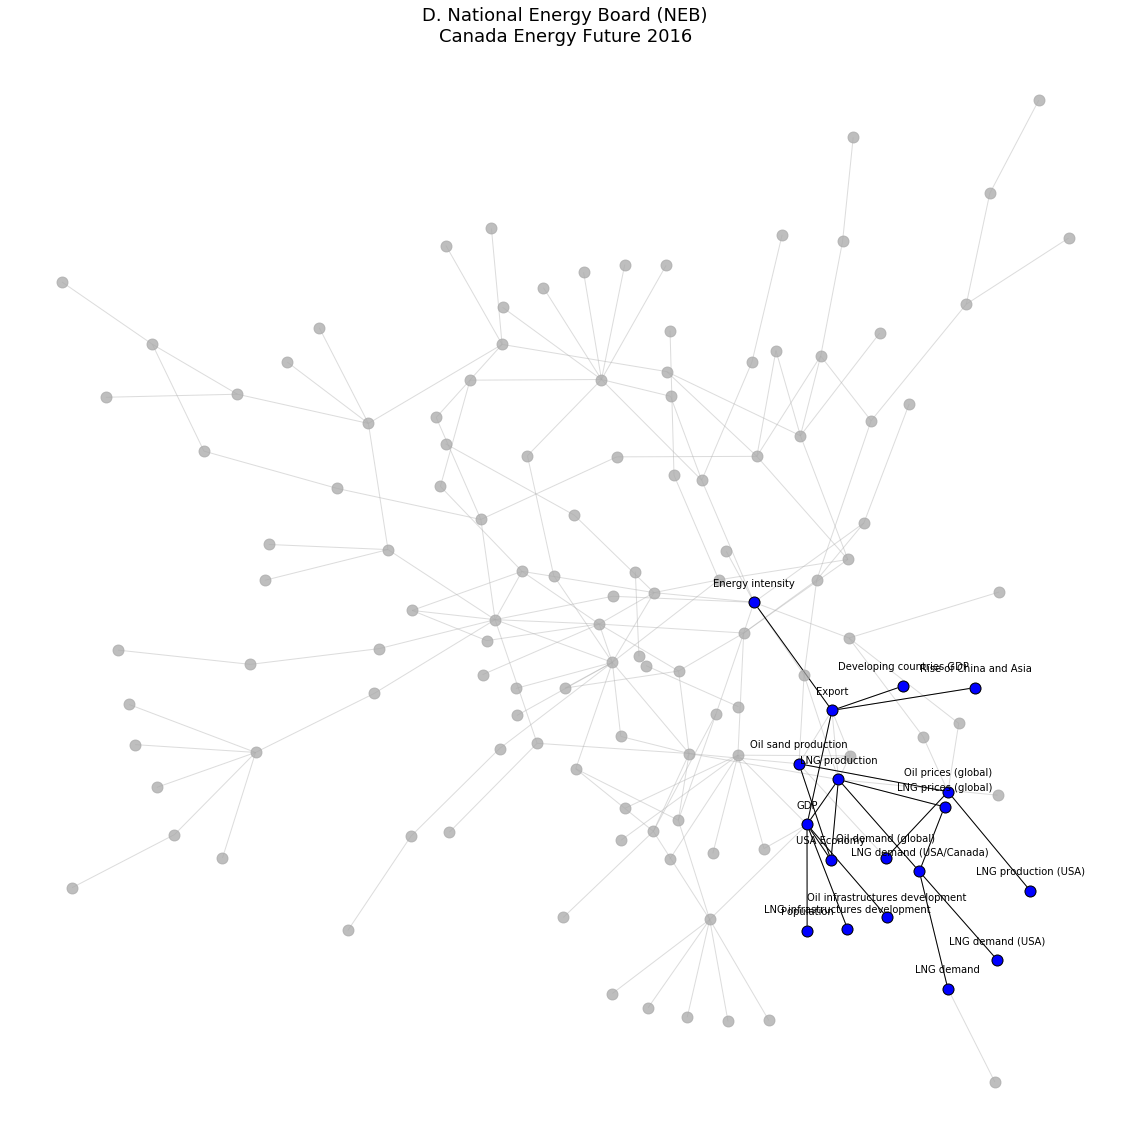

In [17]:
plt.figure(figsize=(20,20))
plt.axis('off')
plt.title(studytext4,fontsize=18)
nx.draw_networkx_nodes(GSE4, layout, node_color='darkgray', node_size=120, alpha=.75)
nx.draw_networkx_edges(GSE4, layout, edge_color='darkgray',width=1, alpha=.4)
nx.draw_networkx_nodes(GSE_neb, layout, node_color='b', node_size=120, edgecolors='k')
nx.draw_networkx_edges(GSE_neb, layout, edge_color='k',width=1)
nx.draw_networkx_labels(GSE_neb, pos_attrs, font_size=10)

plt.savefig('./figures/SNR-ESM-Fig1d.png', bbox_inches = 'tight')
plt.show()

In [18]:
print('The scenario elements or nodes in NEB report are: \n', GSE_neb.nodes())
print('\nThe scenario elements or nodes in Deep Decarbonizations report are: \n', GSE_deep.nodes())

The scenario elements or nodes in NEB report are: 
 ['Oil demand (global)', 'Oil prices (global)', 'LNG production (USA)', 'Oil sand production', 'LNG demand (USA/Canada)', 'LNG prices (global)', 'Population', 'GDP', 'USA Economy', 'Rise of China and Asia', 'Export', 'LNG infrastructures development', 'LNG production', 'Energy intensity', 'Developing countries GDP', 'Oil infrastructures development', 'LNG demand (USA)', 'LNG demand']

The scenario elements or nodes in Deep Decarbonizations report are: 
 ['Fuel switching', 'GHG Emissions (aggregate)', 'Renewable energy generation', 'Wind power production cost', 'Wind power generation', 'Solar power production cost', 'Solar power generation', 'Innovation capacity (global)', 'Banning coal/oil-fired generation', 'Carbon intensity', 'Gas-fired generation', 'LNG demand', 'New clean tech generation', 'Electricity generation', 'Electrification policy', 'Tech dev in renewable energy', 'GHG Emissions (building)', 'Adoption of EV', 'GHG Emissions

In [19]:
# Examine which nodes in NEB are not present in other studies
lsNeb = list(GSE_neb.nodes())
lsDeep = list(GSE_deep.nodes())
lsTrot = list(GSE_trot.nodes())
lsRnrg = list(GSE_rnrg.nodes())
lsNotCommon = list(set(lsNeb) - set(lsDeep + lsTrot + lsRnrg))
lsNotCommon

['USA Economy',
 'LNG demand (USA/Canada)',
 'LNG prices (global)',
 'Population',
 'LNG demand (USA)',
 'LNG infrastructures development',
 'LNG production (USA)',
 'Developing countries GDP',
 'Rise of China and Asia',
 'Oil infrastructures development']

In [20]:
# Examine which nodes in TEFP are not present in other studies
lsNotCommon = list(set(lsTrot) - set(lsDeep + lsNeb + lsRnrg))
lsNotCommon

['GHG Emissions (electricity)',
 'Electricity consumption (residential)',
 'Electricity consumption',
 'LNG demand (global)',
 'Biofuels consumption (Freight)',
 'Hydro electric generation']

In [21]:
# Examine which nodes in DDPC are not present in other studies
lsNotCommon = list(set(lsDeep) - set(lsTrot + lsNeb + lsRnrg))
lsNotCommon

['GHG Emissions (oil and gas)',
 'Electrification policy',
 'Gas-fired generation',
 'Innovation capacity (global)',
 'Banning coal/oil-fired generation',
 'Building retrofit incentives',
 'Blending target policy mandate',
 'GHG Emissions (agriculture)',
 'Transport modal shift',
 'Solar power generation',
 'Fuel switching',
 'Energy efficiency policy mandate',
 'Energy intensity (transport)',
 'Energy tech change (building)',
 'Energy tech change (transport)']

In [22]:
def noteLabelSlim(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.03, width=0.1,headwidth=3.5),
        xytext=xy_text, fontsize=myfontsize)
    return

def noteLabel(descriptor,xy_text,myfontsize):
    x_loc,y_loc = layout[descriptor]
    xy_loc = (x_loc,y_loc)
    plt.annotate(descriptor,
        xy=xy_loc,
        arrowprops=dict(facecolor='k', shrink=0.02, width=0.5),
        xytext=xy_text, fontsize=myfontsize)
    return

## Network Visualization of Eigenvector centrality & Betweenness centrality



In [23]:
# Calculate eigenvector and betweenness centraliites for Canada Multi-study Network
eig = nx.eigenvector_centrality(GSE4)
bet = nx.betweenness_centrality(GSE4)

In [24]:
cent_df = pd.DataFrame.from_dict([eig, bet])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ['Eigenvector', 'Betweenness']

In [25]:
eig_size = [50+1500*eig[n] for n in GSE4.nodes()]
bet_size = [50+1500*bet[n] for n in GSE4.nodes()]

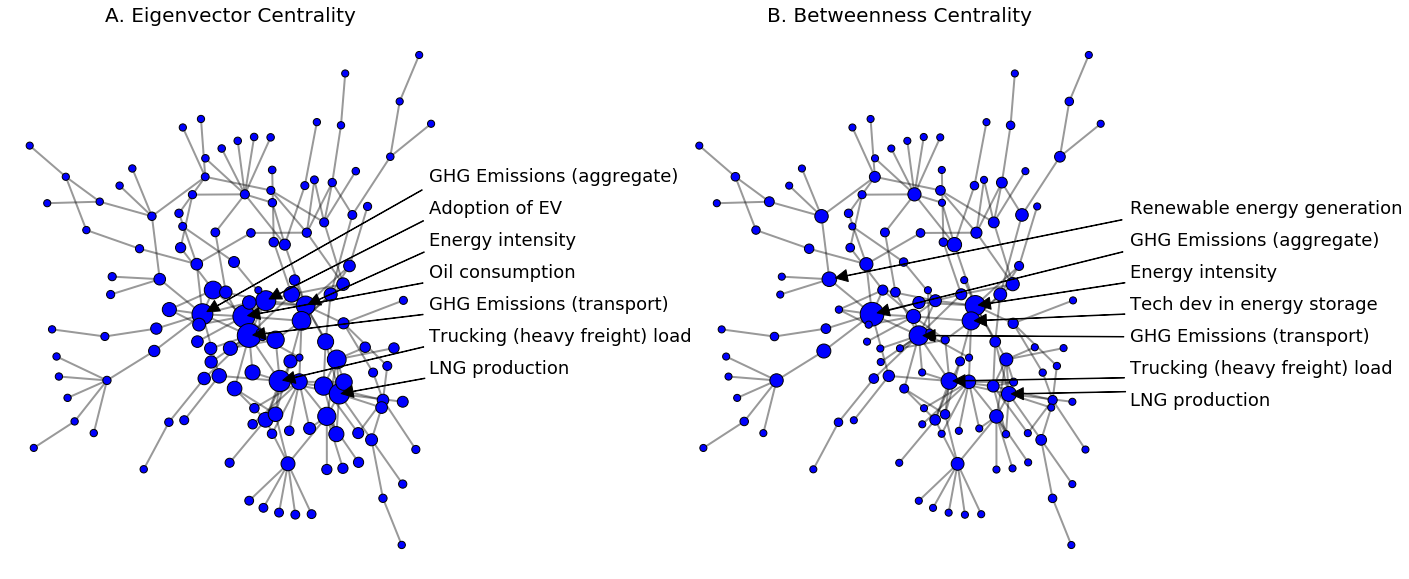

In [26]:
my_fontsize = 18
plt.figure(figsize=(20,10))
plt.axis('off')

plt.subplot(121)
plt.axis('off')
plt.title('A. Eigenvector Centrality',fontsize=20)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=eig_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=2, alpha= .4)

noteLabel('GHG Emissions (aggregate)', (0.4,0.4), my_fontsize)
noteLabel('Adoption of EV', (0.4,0.3), my_fontsize)
noteLabel('Energy intensity', (0.4,0.2), my_fontsize)
noteLabel('Oil consumption', (0.4,0.1), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.4,0), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.4,-0.1), my_fontsize)
noteLabel('LNG production', (0.4,-0.2), my_fontsize)

plt.subplot(122)
plt.axis('off')
plt.title('B. Betweenness Centrality',fontsize=20)
nx.draw_networkx_nodes(GSE4, layout, node_color='b', node_size=bet_size, edgecolors='k')
nx.draw_networkx_edges(GSE4, layout, edge_color='k',width=2, alpha=0.4)

noteLabel('GHG Emissions (aggregate)', (0.5,0.2), my_fontsize)
noteLabel('Renewable energy generation', (0.5,0.3), my_fontsize)
noteLabel('Energy intensity', (0.5,0.1), my_fontsize)
noteLabel('Tech dev in energy storage', (0.5,0.0), my_fontsize)
noteLabel('GHG Emissions (transport)', (0.5,-0.1), my_fontsize)
noteLabel('Trucking (heavy freight) load', (0.5,-0.2), my_fontsize)
noteLabel('LNG production', (0.5,-0.3), my_fontsize)

plt.subplots_adjust(wspace=0.5)
plt.savefig('./figures/SNR-ESM-Fig2.png', bbox_inches = 'tight')
plt.show()

In [27]:
# Scatterplots of centrality metrics
x = cent_df['Eigenvector']
y = cent_df['Betweenness']

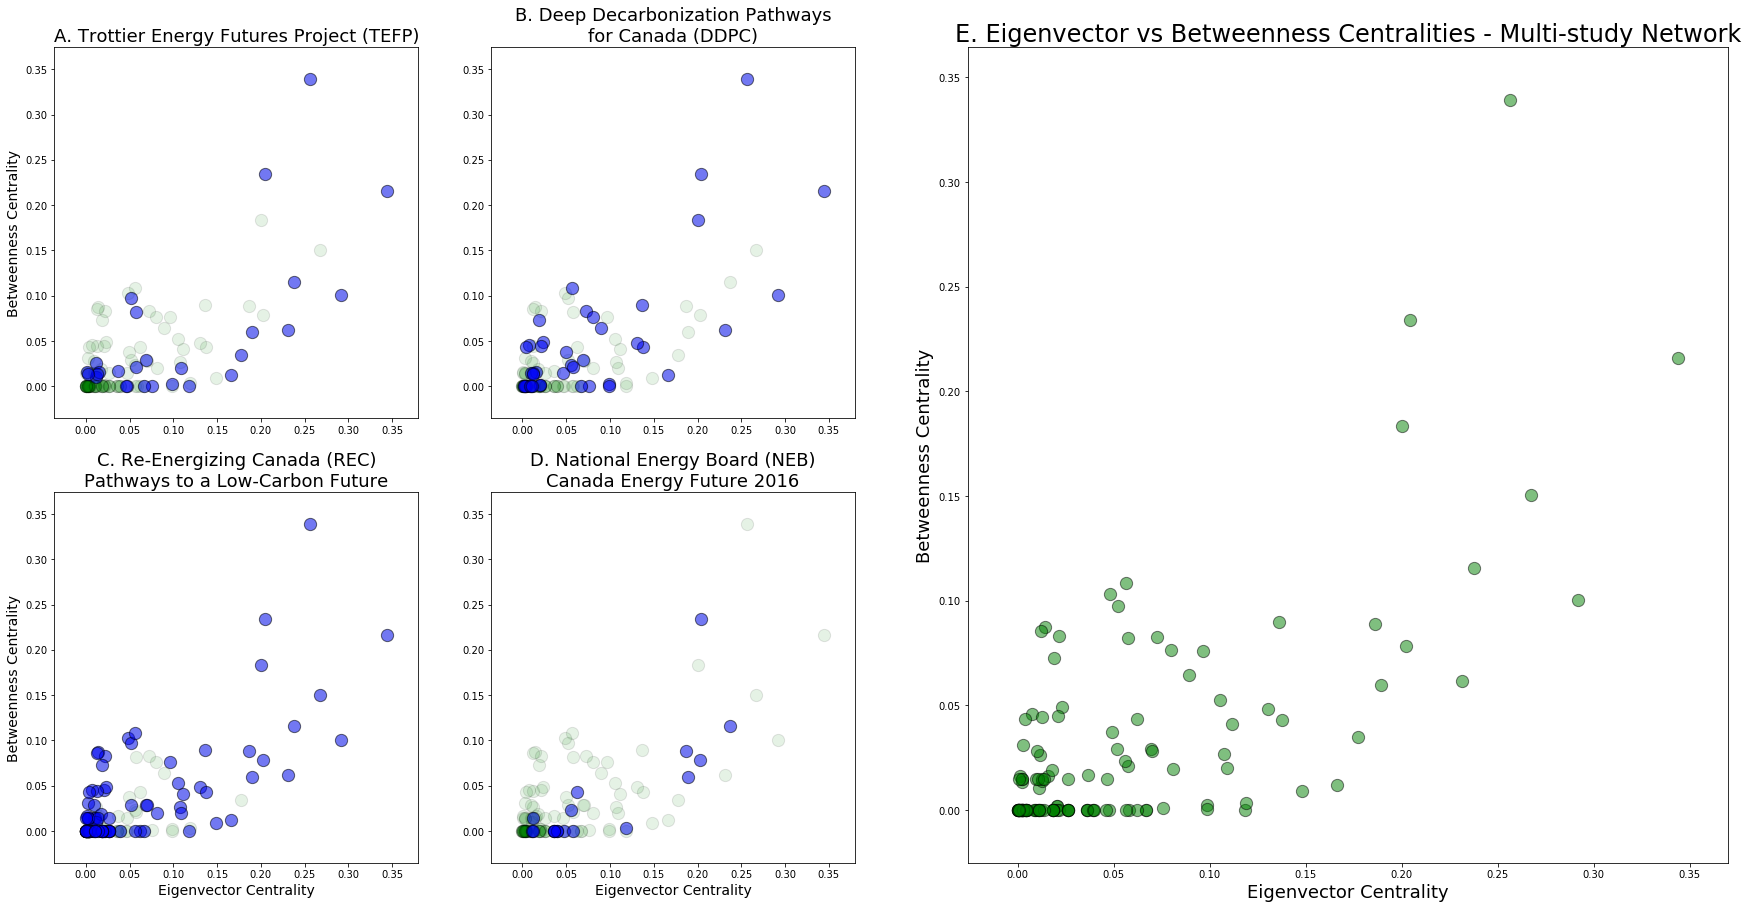

In [28]:
nodesColor = 'b'
bgnodesColor = 'green'
plt.figure(figsize=(30,15))
plt.axis('off')

plt.subplot(122)
plt.title('E. Eigenvector vs Betweenness Centralities - Multi-study Network',fontsize=24)
plt.scatter(x, y, s=150, c='green', edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 18)
plt.xlabel('Eigenvector Centrality', fontsize= 18)

plt.subplot(241)
plt.title(studytext1,fontsize=18)
x1 = pd.Series({x: eig[x] for x in GSE_trot.node()})
y1 = pd.Series({x: bet[x] for x in GSE_trot.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x1, y1, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 14)

plt.subplot(242)
plt.title(studytext2,fontsize=18)
x2 = pd.Series({x: eig[x] for x in GSE_deep.node()})
y2 = pd.Series({x: bet[x] for x in GSE_deep.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x2, y2, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)

plt.subplot(245)
plt.title(studytext3,fontsize=18)
x3 = pd.Series({x: eig[x] for x in GSE_rnrg.node()})
y3 = pd.Series({x: bet[x] for x in GSE_rnrg.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x3, y3, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 14)
plt.xlabel('Eigenvector Centrality', fontsize= 14)

plt.subplot(246)
plt.title(studytext4,fontsize=18)
x4 = pd.Series({x: eig[x] for x in GSE_neb.node()})
y4 = pd.Series({x: bet[x] for x in GSE_neb.node()})
plt.scatter(x, y, s=150, c= bgnodesColor, edgecolors= 'k', alpha=0.1)
plt.scatter(x4, y4, s=150, c= nodesColor, edgecolors= 'k', alpha=0.5)
plt.xlabel('Eigenvector Centrality', fontsize= 14)

plt.savefig('./figures/SNR-ESM-Fig3_2.png', bbox_inches = 'tight')
plt.show()

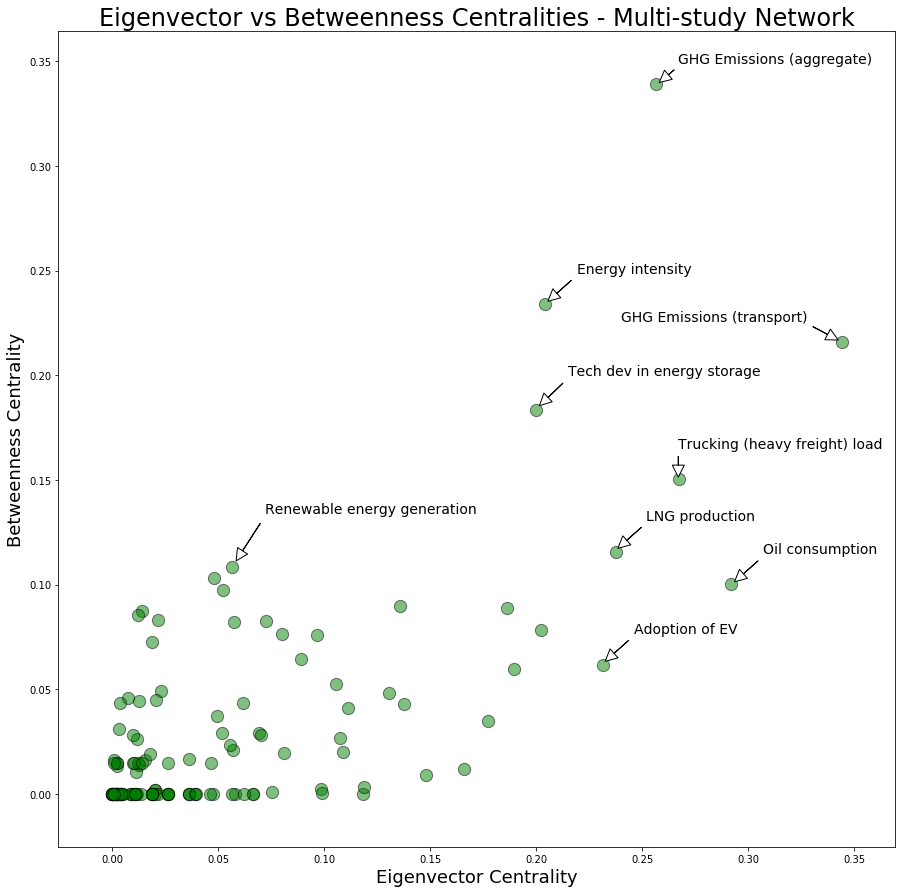

In [29]:
def labelanywhere(string_text,xy_loc,xy_text,myfontsize): # for printing text label annotations (arrow)
    plt.annotate(string_text,
        xy=xy_loc,
        arrowprops=dict(facecolor='white',shrink=0.1, width=0.2),
        xytext=xy_text, fontsize=myfontsize)
    return

plt.figure(figsize=(15,15))

plt.title('Eigenvector vs Betweenness Centralities - Multi-study Network',fontsize=24)
plt.scatter(x, y, s=150, c='green', edgecolors= 'k', alpha=0.5)
plt.ylabel('Betweenness Centrality', fontsize= 18)
plt.xlabel('Eigenvector Centrality', fontsize= 18)

my_fontsize = 14
labelanywhere('Adoption of EV', (0.231,0.062),(0.246,0.077), my_fontsize)
labelanywhere('Energy intensity', (0.204,0.234), (0.219,0.249), my_fontsize)
labelanywhere('Oil consumption', (0.292,0.100), (0.307,0.115),my_fontsize)
labelanywhere('GHG Emissions (transport)', (0.344,0.216),(0.240,0.226), my_fontsize)
labelanywhere('Trucking (heavy freight) load', (0.267,0.150),(0.267,0.165), my_fontsize)
labelanywhere('LNG production', (0.237,0.116), (0.252,0.131), my_fontsize)
labelanywhere('GHG Emissions (aggregate)', (0.257,0.339),(0.267,0.349), my_fontsize)
labelanywhere('Renewable energy generation', (0.057,0.109),(0.072,0.134), my_fontsize)
labelanywhere('Tech dev in energy storage', (0.2,0.184), (0.215,0.2),my_fontsize)
#labelanywhere('Active moibility', (0.048,0.103), (-0.02,0.118), my_fontsize)

plt.savefig('./figures/SNR-ESM-Fig3.png', bbox_inches = 'tight')
plt.show()

In [30]:
cent_df.sort_values('Eigenvector',ascending=False).head(25)

,Eigenvector,Betweenness
GHG Emissions (transport),0.344127,0.216002
Oil consumption,0.291998,0.100315
Trucking (heavy freight) load,0.267228,0.150394
GHG Emissions (aggregate),0.256534,0.339049
LNG production,0.237551,0.115559
Adoption of EV,0.231423,0.061744
Energy intensity,0.204339,0.233946
Export,0.202214,0.078317
Tech dev in energy storage,0.199930,0.183621
Oil sand production,0.189331,0.059576


In [31]:
cent_df.sort_values('Betweenness',ascending=False).head(25)

,Eigenvector,Betweenness
GHG Emissions (aggregate),0.256534,0.339049
Energy intensity,0.204339,0.233946
GHG Emissions (transport),0.344127,0.216002
Tech dev in energy storage,0.199930,0.183621
Trucking (heavy freight) load,0.267228,0.150394
LNG production,0.237551,0.115559
Renewable energy generation,0.056670,0.108577
Active mobility,0.048277,0.102942
Oil consumption,0.291998,0.100315
Sectoral coordination,0.052094,0.097289
